# 예제로 배우는 파이토치(PYTORCH)

https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html

여기에 제가 공부하면서 조금 더 필요한 내용들을 추가했습니다:)

# Numpy 신경망 구성해보기

PyTorch를 소개하기 전에, 먼저 NumPy를 사용하여 신경망을 구성해보겠습니다.

NumPy는 n-차원 배열 객체와 이러한 배열들을 조작하기 위한 다양한 함수들을 제공합니다. NumPy는 과학 분야의 연산을 위한 포괄적인 프레임워크(generic framework)입니다; NumPy는 연산 그래프(computation graph)나 딥러닝, 변화도(gradient)에 대해서는 알지 못합니다. 하지만 NumPy 연산을 사용하여 신경망의 순전파 단계와 역전파 단계를 직접 구현함으로써, 3차 다항식이 사인(sine) 함수에 근사하도록 만들 수 있습니다:

In [1]:
import numpy as np
import math # math module -> mathematical functions을 제공

# 무작위로 입력과 출력 데이터를 생성합니다
# generates 2000 evenly spaced values between −π and π
# np.linspace -> create an array of numbers
# sine of each value in array the x (so same length)
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# 무작위로 가중치를 초기화합니다
# 가중치 a,b,c,d 초기화 from a 'standard normal distribution'
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    # sum of squared error
    # 99, 199, 299, ... iteration에서 print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    # grad_y_pred -> loss 미분한 거
    # derivativ of each a, b, c, d
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 695.0472966844846
199 470.6567663488462
299 319.91933589318387
399 218.57469535766094
499 150.37911474925218
599 104.44873945412134
699 73.48564699369265
799 52.59263189267243
899 38.48085224746059
999 28.93977903727818
1099 22.482378488060803
1199 18.107430708179248
1299 15.140198742232663
1399 13.125539520904756
1499 11.756139733443014
1599 10.824294884499764
1699 10.189480486654691
1799 9.756524461927697
1899 9.46090186840896
1999 9.25881871657736
Result: y = -0.01652483024136525 + 0.8430648729654898 x + 0.0028508081909976316 x^2 + -0.09138510138408942 x^3


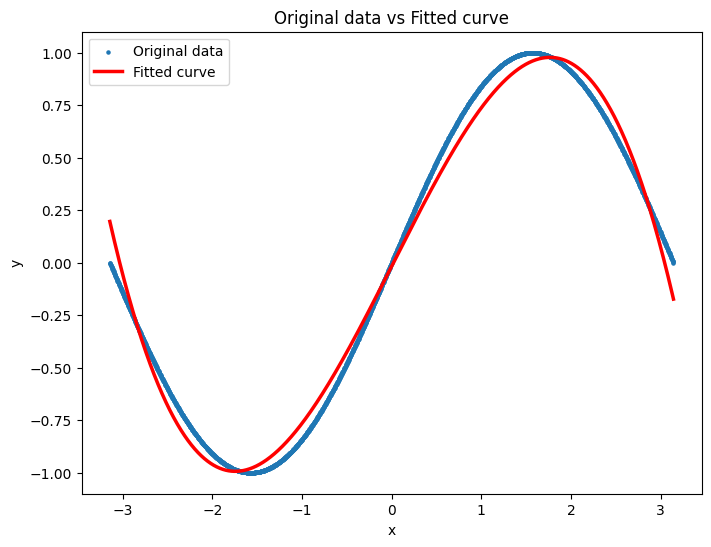

In [3]:
# visualize the result y and the original sine wave
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, label='Original data')
plt.plot(x, y_pred, color='r', linewidth=2.5, label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original data vs Fitted curve')
plt.legend()
plt.show()

# Pytorch : Tensor를 이용해서 신경망 구성하기

NumPy는 훌륭한 프레임워크지만, GPU를 사용하여 수치 연산을 가속화할 수는 없습니다. 현대의 심층 신경망에서 GPU는 종종 50배 또는 그 이상 의 속도 향상을 제공하기 때문에, 안타깝게도 NumPy는 현대의 딥러닝에는 충분치 않습니다.

이번에는 PyTorch의 가장 핵심적인 개념인 텐서(Tensor) 에 대해서 알아보겠습니다. PyTorch 텐서(Tensor)는 개념적으로 NumPy 배열과 동일합니다: 텐서(Tensor)는 n-차원 배열이며, PyTorch는 이러한 텐서들의 연산을 위한 다양한 기능들을 제공합니다. NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구입니다. 텐서는 연산 그래프와 변화도를 추적할 수도 있지만, 과학적 연산을 위한 일반적인 도구로도 유용합니다.

또한 NumPy와는 다르게, PyTorch 텐서는 GPU를 사용하여 수치 연산을 가속할 수 있습니다. PyTorch 텐서를 GPU에서 실행하기 위해서는 단지 적절한 장치를 지정해주기만 하면 됩니다.

여기에서는 PyTorch 텐서를 사용하여 3차 다항식을 사인(sine) 함수에 근사해보겠습니다. 위의 NumPy 예제에서와 같이 신경망의 순전파 단계와 역전파 단계는 직접 구현하겠습니다:



In [4]:
import torch
import math

# type of data : 32-bit floating-point number
## torch.double: 64-bit floating-point number (equivalent to Python's float64)
## torch.int: 32-bit integer (equivalent to Python's int32)
## torch.long: 64-bit integer (equivalent to Python's int64)
## torch.bool: Boolean data type
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 무작위로 입력과 출력 데이터를 생성합니다
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 무작위로 가중치를 초기화합니다
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    # pow : squares each element of the tensor (y_pred - y)
    # item : extract the scalar value from the tensor
    # since loss is a tensor of size () (a scalar tensor), .item() retrieves its Python numeric value
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2504.72412109375
199 1668.788818359375
299 1113.23388671875
399 743.896728515625
499 498.2739562988281
599 334.8662109375
699 226.1124267578125
799 153.70343017578125
899 105.47239685058594
999 73.33124542236328
1099 51.9022216796875
1199 37.60807800292969
1299 28.067996978759766
1399 21.69741439819336
1499 17.440866470336914
1599 14.594995498657227
1699 12.69111156463623
1799 11.416582107543945
1899 10.562775611877441
1999 9.99036979675293
Result: y = -0.017978781834244728 + 0.8278271555900574 x + 0.0031016403809189796 x^2 + -0.0892176702618599 x^3


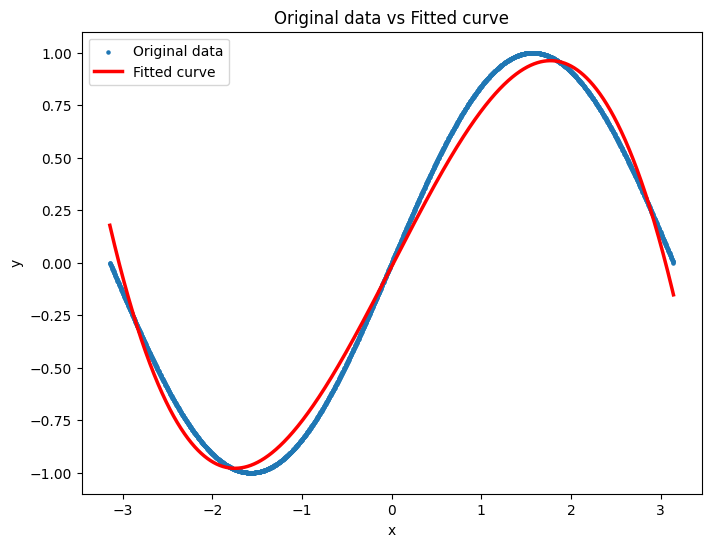

In [5]:
# x.cpu : move the tensor x from gpu to cpu
# matplotlib works directly with NumPy arrays
# .numpy : convert tensor to nupy array
x_cpu = x.cpu().numpy()
y_pred_cpu = y_pred.cpu().detach().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(x_cpu, y.cpu().numpy(), s=5, label='Original data')
plt.plot(x_cpu, y_pred_cpu, color='r', linewidth=2.5, label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original data vs Fitted curve')
plt.legend()
plt.show()

# Pytorch : Tensor and Autograd

위의 예제들에서는 신경망의 순전파 단계와 역전파 단계를 직접 구현해보았습니다. 작은 2계층(2-layer) 신경망에서는 역전파 단계를 직접 구현하는 것이 큰일이 아니지만, 복잡한 대규모 신경망에서는 매우 아슬아슬한 일일 것입니다.

다행히도, 자동 미분 을 사용하여 신경망의 역전파 단계 연산을 자동화할 수 있습니다. PyTorch의 autograd 패키지는 정확히 이런 기능을 제공합니다. Autograd를 사용하면, 신경망의 순전파 단계에서 연산 그래프(computational graph) 를 정의하게 됩니다; 이 그래프의 노드(node)는 텐서(tensor)이고, 엣지(edge)는 입력 텐서로부터 출력 텐서를 만들어내는 함수가 됩니다. 이 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있습니다.

이는 복잡하게 들리겠지만, 실제로 사용하는 것은 매우 간단합니다. 각 텐서는 연산그래프에서 노드로 표현됩니다. 만약 x 가 x.requires_grad=True 인 텐서라면 x.grad 어떤 스칼라 값에 대한 x 의 변화도를 갖는 또 다른 텐서입니다.

여기서는 PyTorch 텐서와 autograd를 사용하여 3차 다항식을 사인파(sine wave)에 근사하는 예제를 구현해보겠습니다; 이제 더 이상 신경망의 역전파 단계를 직접 구현할 필요가 없습니다:

In [1]:
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를
# 계산할 필요가 없음을 나타냅니다
# requires_grad=False 안 써도 됨
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b x + c x^2 + d x^3
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y를 계산합니다.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 텐서들간의 연산을 사용하여 손실(loss)을 계산하고 출력합니다.
    # 이 때 손실은 (1,) shape을 갖는 텐서입니다.
    # loss.item() 으로 손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd 를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를 갖는
    # 모든 텐서들에 대한 손실의 변화도를 계산합니다.
    # 이후 a.grad와 b.grad, c.grad, d.grad는 각각 a, b, c, d에 대한 손실의 변화도를
    # 갖는 텐서가 됩니다.
    loss.backward()

    # 경사하강법(gradient descent)을 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1798.068603515625
199 1274.9219970703125
299 904.7437744140625
399 642.7979736328125
499 457.4398193359375
599 326.2760009765625
699 233.4612579345703
799 167.78271484375
899 121.30668640136719
999 88.41876220703125
1099 65.14617919921875
1199 48.67774200439453
1299 37.024070739746094
1399 28.777511596679688
1499 22.941951751708984
1599 18.812463760375977
1699 15.890268325805664
1799 13.822407722473145
1899 12.359103202819824
1999 11.32359790802002
Result: y = -0.052987392991781235 + 0.856063961982727 x + 0.009141209535300732 x^2 + -0.0932340994477272 x^3


# Pytorch : autograd function 정의하기

내부적으로, autograd의 기본(primitive) 연산자는 실제로 텐서를 조작하는 2개의 함수입니다. forward 함수는 입력 텐서로부터 출력 텐서를 계산합니다. backward 함수는 어떤 스칼라 값에 대한 출력 텐서의 변화도(gradient)를 전달받고, 동일한 스칼라 값에 대한 입력 텐서의 변화도를 계산합니다.

PyTorch에서 torch.autograd.Function 의 하위클래스(subclass)를 정의하고 forward 와 backward 함수를 구현함으로써 사용자 정의 autograd 연산자를 손쉽게 정의할 수 있습니다. 그 후, 인스턴스(instance)를 생성하고 이를 함수처럼 호출하고, 입력 데이터를 갖는 텐서를 전달하는 식으로 새로운 autograd 연산자를 사용할 수 있습니다.


In [1]:
import torch
import math

# torch.autograd.Function :
# base class that allows you to define and compute gradients for your own operations on tensors
class LegendrePolynomial3(torch.autograd.Function):
    """
    torch.autograd.Function을 상속받아 사용자 정의 autograd Function을 구현하고,
    텐서 연산을 하는 순전파 단계와 역전파 단계를 구현해보겠습니다.
    """

# ctx : store information needed for the backward pass
# return : the computed tensor as the result of the forward pass
    @staticmethod
    def forward(ctx, input):
        """
        순전파 단계에서는 입력을 갖는 텐서를 받아 출력을 갖는 텐서를 반환합니다.
        ctx는 컨텍스트 객체(context object)로 역전파 연산을 위한 정보 저장에 사용합니다.
        ctx.save_for_backward 메소드를 사용하여 역전파 단계에서 사용할 어떤 객체도
        저장(cache)해 둘 수 있습니다.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

# ctx : stores saved tensors from the forward pass
# grad_output : the gradient of the loss with respect to the output of this function
    @staticmethod
    def backward(ctx, grad_output):
        """
        역전파 단계에서는 출력에 대한 손실(loss)의 변화도(gradient)를 갖는 텐서를 받고,
        입력에 대한 손실의 변화도를 계산해야 합니다.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할
# 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b * P3(c + d * x)
# 이 가중치들이 수렴(convergence)하기 위해서는 정답으로부터 너무 멀리 떨어지지 않은 값으로
# 초기화가 되어야 합니다.
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다.
# torch.full : creates a tensor of a specified shape (in this case, a scalar)
# use to start with specific value (determinisstic starting value)
# 0.0, -1.0, 0.0, 0.3 : initialized value
# () : scalar shape
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # 사용자 정의 Function을 적용하기 위해 Function.apply 메소드를 사용합니다.
    # 여기에 'P3'라고 이름을 붙였습니다.
    # apply : static method of torch.autograd.Function
    # that allows you to apply LegendrePolynomial3 to tensors
    P3 = LegendrePolynomial3.apply

    # 순전파 단계: 연산을 하여 예측값 y를 계산합니다;
    # 사용자 정의 autograd 연산을 사용하여 P3를 계산합니다.
    y_pred = a + b * P3(c + d * x)

    # 손실을 계산하고 출력합니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd를 사용하여 역전파 단계를 계산합니다.
    loss.backward()

    # 경사하강법(gradient descent)을 사용하여 가중치를 갱신합니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.978511810302734
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918045043945
1299 10.71425724029541
1399 10.10548210144043
1499 9.692105293273926
1599 9.411375999450684
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943641662597656
Result: y = -6.71270206087371e-10 + -2.208526849746704 * P3(-3.392665037793563e-10 + 0.2554861009120941 x)


# Pytorch : nn

연산 그래프와 autograd는 복잡한 연산자를 정의하고 도함수(derivative)를 자동으로 계산하는 매우 강력한 패러다임(paradigm)입니다; 하지만 대규모 신경망에서는 autograd 그 자체만으로는 너무 저수준(low-level)일 수 있습니다.

신경망을 구성하는 것을 종종 연산을 계층(layer) 에 배열(arrange)하는 것으로 생각하는데, 이 중 일부는 학습 도중 최적화가 될 학습 가능한 매개변수 를 갖고 있습니다.

텐서플로우(Tensorflow)에서는, Keras 와 TensorFlow-Slim, TFLearn 같은 패키지들이 연산 그래프를 고수준(high-level)으로 추상화(abstraction)하여 제공하므로 신경망을 구축하는데 유용합니다.

파이토치(PyTorch)에서는 nn 패키지가 동일한 목적으로 제공됩니다. nn 패키지는 신경망 계층(layer)과 거의 비슷한 Module 의 집합을 정의합니다. Module은 입력 텐서를 받고 출력 텐서를 계산하는 한편, 학습 가능한 매개변수를 갖는 텐서들을 내부 상태(internal state)로 갖습니다. nn 패키지는 또한 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수(loss function)들도 정의하고 있습니다.

이 예제에서는 nn 패키지를 사용하여 다항식 모델을 구현해보겠습니다:

In [2]:
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 이 예제에서, 출력 y는 (x, x^2, x^3)의 선형 함수이므로, 선형 계층 신경망으로 간주할 수 있습니다.
# (x, x^2, x^3)를 위한 텐서를 준비합니다.
# tensor p는 지수로 사용된다.
# elementwise power operation between x.unsqueeze(-1) and p
# squeeze : 차원이 1인 차원을 제거
# unsqueeze : 차원이 1인 차원을 추가 (-1 : 마지막 차원)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# 위 코드에서, x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.

# nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.
# nn.Sequential은 다른 Module을 포함하는 Module로, 포함되는 Module들을 순차적으로 적용하여
# 출력을 생성합니다. 각각의 Linear Module은 선형 함수(linear function)를 사용하여 입력으로부터
# 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
# Flatten 계층은 선형 계층의 출력을 `y` 의 shape과 맞도록(match) 1D 텐서로 폅니다(flatten).
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# 또한 nn 패키지에는 주로 사용되는 손실 함수(loss function)들에 대한 정의도 포함되어 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.
# sum : sum of squared errors across all elements in the input tensors
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # 순전파 단계: x를 모델에 전달하여 예측값 y를 계산합니다. Module 객체는 __call__ 연산자를
    # 덮어써서(override) 함수처럼 호출할 수 있도록 합니다. 이렇게 함으로써 입력 데이터의 텐서를 Module에 전달하여
    # 출력 데이터의 텐서를 생성합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다. 예측한 y와 정답인 y를 갖는 텐서들을 전달하고,
    # 손실 함수는 손실(loss)을 갖는 텐서를 반환합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
    model.zero_grad()

    # 역전파 단계: 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산합니다.
    # 내부적으로 각 Module의 매개변수는 requires_grad=True일 때 텐서에 저장되므로,
    # 아래 호출은 모델의 모든 학습 가능한 매개변수의 변화도를 계산하게 됩니다.
    loss.backward()

    # 경사하강법을 사용하여 가중치를 갱신합니다.
    # 각 매개변수는 텐서이므로, 이전에 했던 것처럼 변화도에 접근할 수 있습니다.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# list의 첫번째 항목에 접근하는 것처럼 `model` 의 첫번째 계층(layer)에 접근할 수 있습니다.
# index를 통해 layer에 접근 가능
linear_layer = model[0]

# 선형 계층에서, 매개변수는 `weights` 와 `bias` 로 저장됩니다.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 351.842041015625
199 246.17279052734375
299 173.22035217285156
399 122.80220031738281
499 87.92155456542969
599 63.76567459106445
699 47.0206298828125
799 35.40165710449219
899 27.33199119567871
999 21.72234344482422
1099 17.81934356689453
1199 15.101493835449219
1299 13.20734691619873
1399 11.886242866516113
1499 10.964117050170898
1599 10.3200044631958
1699 9.869775772094727
1799 9.554852485656738
1899 9.334434509277344
1999 9.180066108703613
Result: y = -0.01887684129178524 + 0.8502304553985596 x + 0.003256569616496563 x^2 + -0.09240434318780899 x^3


# Pytorch : optim


지금까지는 torch.no_grad() 로 학습 가능한 매개변수를 갖는 텐서들을 직접 조작하여 모델의 가중치(weight)를 갱신하였습니다. 이것은 확률적 경사하강법(SGD; stochastic gradient descent)와 같은 간단한 최적화 알고리즘에서는 크게 부담이 되지 않지만, 실제로 신경망을 학습할 때는 AdaGrad, RMSProp, Adam 등과 같은 더 정교한 옵티마이저(optimizer)를 사용하곤 합니다.

PyTorch의 optim 패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘의 구현체(implementation)를 제공합니다.

이 예제에서는 지금까지와 같이 nn 패키지를 사용하여 모델을 정의하지만, 모델을 최적화할 때는 optim 패키지가 제공하는 RMSProp 알고리즘을 사용하겠습니다:



In [2]:
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.(weight and bias)
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 2758.81884765625
199 1508.1790771484375
299 957.3157958984375
399 650.87890625
499 436.0124206542969
599 282.1549987792969
699 172.63113403320312
799 97.20682525634766
899 49.32280731201172
999 23.211261749267578
1099 12.191632270812988
1199 9.22814655303955
1299 8.858451843261719
1399 8.875911712646484
1499 9.107494354248047
1599 8.917835235595703
1699 8.93196964263916
1799 8.928377151489258
1899 8.920852661132812
1999 8.916589736938477
Result: y = -0.0003794374060817063 + 0.8562389016151428 x + -0.0003921450115740299 x^2 + -0.09383273869752884 x^3


# Pytorch : 사용자 정의 nn module

때때로 기존 Module의 구성(sequence)보다 더 복잡한 모델을 구성해야 할 때가 있습니다. 이러한 경우에는 nn.Module 의 하위 클래스(subclass)로 새로운 Module을 정의하고, 입력 텐서를 받아 다른 모듈 및 autograd 연산을 사용하여 출력 텐서를 만드는 forward 를 정의합니다.

이 예제에서는 3차 다항식을 사용자 정의 Module 하위클래스(subclass)로 구현해보겠습니다:



In [3]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 4개의 매개변수를 생성(instantiate)하고, 멤버 변수로 지정합니다.
        """
        # parent class의 속성 및 메소드를 불러와 해당 class에서도 사용이 가능하도록 함
        # 여기서의 parent class : torch.nn.Module
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
        텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = Polynomial3()

# 손실 함수와 optimizer를 생성합니다. SGD 생성자에 model.paramaters()를 호출해주면
# 모델의 멤버 학습 가능한 (torch.nn.Parameter로 정의된) 매개변수들이 포함됩니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 4654.046875
199 3293.4619140625
299 2331.51171875
399 1651.357421875
499 1170.424560546875
599 830.3418579101562
699 589.8479614257812
799 419.7713928222656
899 299.4887390136719
999 214.41818237304688
1099 154.2495574951172
1199 111.69198608398438
1299 81.58987426757812
1399 60.29716873168945
1499 45.23530960083008
1599 34.580772399902344
1699 27.043704986572266
1799 21.711835861206055
1899 17.93986701965332
1999 15.271387100219727
Result: y = 0.08489585667848587 + 0.852241575717926 x + -0.01464594341814518 x^2 + -0.09269040822982788 x^3


# Pytorch : Control flow and Weight sharing

동적 그래프와 가중치 공유의 예를 보이기 위해, 매우 이상한 모델을 구현해보겠습니다: 각 순전파 단계에서 3 ~ 5 사이의 임의의 숫자(random number)를 선택하여 다차항들에서 사용하고, 동일한 가중치를 여러번 재사용하여 4차항과 5차항을 계산합니다.

이 모델에서는 일반적인 Python 제어 흐름을 사용하여 반복(loop)을 구현할 수 있으며, 순전파 단계를 정의할 때 동일한 매개변수를 여러번 재사용하여 가중치 공유를 구현할 수 있습니다.

이러한 모델을 Module을 상속받는 하위클래스로 간단히 구현해보겠습니다:



In [1]:
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 5개의 매개변수를 생성(instantiate)하고 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        모델의 순전파 단계에서는 무작위로 4, 5 중 하나를 선택한 뒤 매개변수 e를 재사용하여
        이 차수들의의 기여도(contribution)를 계산합니다.

        각 순전파 단계는 동적 연산 그래프를 구성하기 때문에, 모델의 순전파 단계를 정의할 때
        반복문이나 조건문과 같은 일반적인 Python 제어-흐름 연산자를 사용할 수 있습니다.

        여기에서 연산 그래프를 정의할 때 동일한 매개변수를 여러번 사용하는 것이 완벽히 안전하다는
        것을 알 수 있습니다.
        """
        # 다항식에 더 높은 차수의 항을 추가하는 loop
        # range(4, random.randint(4, 6)): generates a range starting at 4
        # and ending at a random value between 4 and 6
        # if random.randint(4, 6) returns 4 -> only the 4th degree term
        # if random.randint(4, 6) returns 5 -> both the 4th and 5th degree terms
        # if random.randint(4, 6) returns 6 -> the 4th, 5th, and 6th degree terms
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        # ? : the potential presence of the 4th and 5th-degree terms
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = DynamicNet()

# 손실 함수와 optimizer를 생성합니다. 이 이상한 모델을 순수한 확률적 경사하강법(SGD; Stochastic Gradient Descent)으로
# 학습하는 것은 어려우므로, 모멘텀(momentum)을 사용합니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 2022.71923828125
3999 1004.8577270507812
5999 588.3018188476562
7999 254.92532348632812
9999 133.4498291015625
11999 72.41664123535156
13999 40.774574279785156
15999 24.847949981689453
17999 16.9168758392334
19999 12.827157974243164
21999 10.71538257598877
23999 9.829163551330566
25999 9.143280982971191
27999 8.859301567077637
29999 8.656438827514648
Result: y = -0.011532711796462536 + 0.8570475578308105 x + 0.0014638612046837807 x^2 + -0.09383798390626907 x^3 + 0.00015067814092617482 x^4 ? + 0.00015067814092617482 x^5 ?
